In [1]:
import os
import subprocess

In [2]:
env_file = 'model_downloader.py'
env_url = "https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/utils/model_downloader.py"

if not os.path.isfile(env_file):
    print(f"Downloading {env_file} ...")
    subprocess.run(
        ['wget', '-q', '-O', env_file, env_url],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )
    print(f"{env_file} downloaded.")
else:
    print(f"{env_file} already exists.")

from model_downloader import download_everything

trajectory = download_everything('td3, TBP, td3_models')

model_downloader.py already exists.
trajectory.csv already exists.
Trajectory head:
   0.87018  -0.059444  0  -0.010472  -0.17514  0.1
0  0.87018  -0.059540  0  -0.010536  -0.17494    0
1  0.87017  -0.059636  0  -0.010600  -0.17474    0
2  0.87017  -0.059732  0  -0.010664  -0.17454    0
3  0.87016  -0.059828  0  -0.010728  -0.17434    0
4  0.87015  -0.059924  0  -0.010793  -0.17414    0
Data shape: (9999, 6)
TBP.py already exists.
TD3.py already exists.


In [3]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

In [4]:
from TD3 import TD3
from TD3 import MLPActorCritic
from utils.logx import EpochLogger
from utils.logx import colorize
from utils.run_utils import setup_logger_kwargs
from TBP import ThreeBodyEnv
import torch

Directory 'utils' already exists.
trajectory.csv already exists.


In [5]:
# Define variables directly
env = ThreeBodyEnv(trajectory)
hid = 32
l = 2
gamma = 0.99
seed = 0
epochs = 50
exp_name = 'TD3'
steps_per_epoch_=30000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ac_kwargs = dict(hidden_sizes=[hid]*l)
states_array = []
logger_kwargs = setup_logger_kwargs(exp_name, seed)


In [6]:
td3 = TD3(lambda : ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001), MLPActorCritic, ac_kwargs,seed=seed, steps_per_epoch=steps_per_epoch_, epochs=epochs, logger_kwargs=logger_kwargs, batch_size=1024, start_steps=5000, update_after=1000, update_every=2000)


# ddpg = DDPG(lambda : ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001), MLPActorCritic, ac_kwargs,seed_=seed, steps_per_epoch=steps_per_epoch_, epochs_=epochs, logger_kwargs_=logger_kwargs, device=device, batch_size=1024, start_steps=5000, update_after=1000, update_every=2000)

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/TBP/TD3/Standard/data/TD3/TD3_s0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "env_fn":	"<function <lambda> at 0x15c418720>",
    "epochs":	50,
    "exp_name":	"TD3",
    "gamma":	0.99,
    "logger_kwargs":	{
        "exp_name":	"TD3",
        "output_dir":	"/Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/TBP/TD3/Standard/data/TD3/TD3_s0"
    },
    "max_ep_len":	30000,
    "noise_clip":	0.5,
    "num_test_episodes":	10,
    "pi_lr":	0.001,
    "policy_delay":	2,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed":	0,
    "self":	{
        "<TD3.TD3 object at 0x15c444a90>":	{
            "ac_kwargs":	{
                "hidden_sizes":	[
                    32,
                    32
           

In [7]:
# td3.save()
td3.load()
# td3.epochs = 10

Model loaded successfully and device is cpu! 🥰😎


done 🥺
second player was in the game
Data saved to results folder 😜


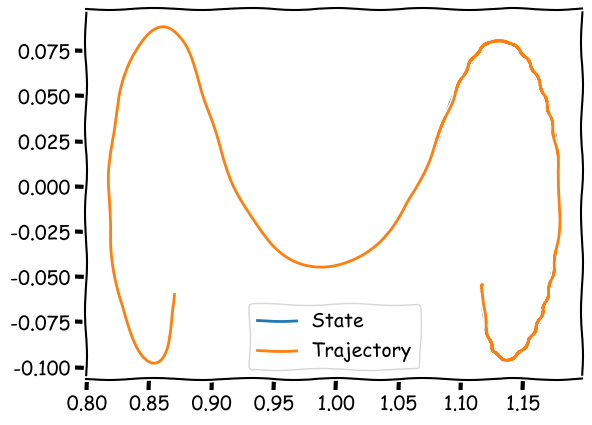

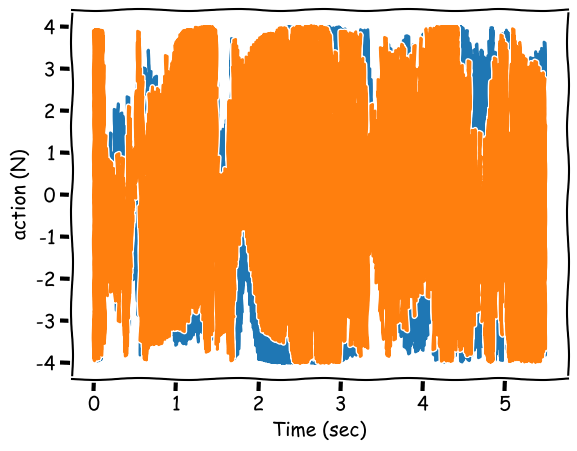

In [8]:
td3.test(fun_mode=True, save_data=True)

In [9]:
# td3.train()